# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

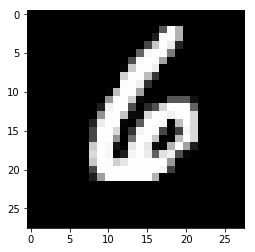

In [12]:
img = mnist.train.images[155]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
image_size = mnist.train.images.shape[1]
image_size

784

In [20]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

#create placeholders for input & target, with image_size
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

#create a dense layer
# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

#create a dense layer
# Output layer logits, try with sigmoid
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

#try using sigmoid in logits and see how it will be different

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [21]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [22]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6846
Epoch: 1/20... Training loss: 0.6808
Epoch: 1/20... Training loss: 0.6752
Epoch: 1/20... Training loss: 0.6692
Epoch: 1/20... Training loss: 0.6621
Epoch: 1/20... Training loss: 0.6532
Epoch: 1/20... Training loss: 0.6439
Epoch: 1/20... Training loss: 0.6326
Epoch: 1/20... Training loss: 0.6221
Epoch: 1/20... Training loss: 0.6109
Epoch: 1/20... Training loss: 0.5980
Epoch: 1/20... Training loss: 0.5808
Epoch: 1/20... Training loss: 0.5671
Epoch: 1/20... Training loss: 0.5500
Epoch: 1/20... Training loss: 0.5316
Epoch: 1/20... Training loss: 0.5159
Epoch: 1/20... Training loss: 0.5002
Epoch: 1/20... Training loss: 0.4869
Epoch: 1/20... Training loss: 0.4677
Epoch: 1/20... Training loss: 0.4468
Epoch: 1/20... Training loss: 0.4343
Epoch: 1/20... Training loss: 0.4201
Epoch: 1/20... Training loss: 0.4089
Epoch: 1/20... Training loss: 0.3933
E

Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1786
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1797
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1882
E

Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1477
E

Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1339
E

Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1193
E

Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1141
E

Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1027
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1055
E

Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.0982
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.0985
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0978
Epoch: 6/20... Training loss: 0.0980
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0954
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0981
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0924
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0994
E

Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0935
E

Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0990
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0886
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

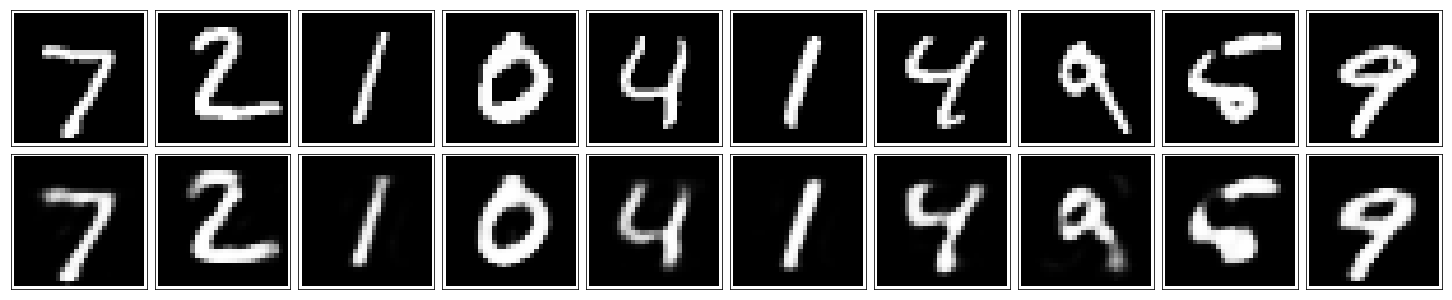

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.